# Classification with transfer learning (VGG16 model)
- dataset consists of 10000 images of dog and cats
- cats are labelled 1 and dogs as 0

In [1]:
import cv2
from os import listdir
import numpy as np

from numpy import save

In [2]:
images=np.load('dogs_vs_cats_photos3.npy')
labels=np.load('dogs_vs_cats_labels3.npy')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train,x_test, y_train,y_test=train_test_split(images, labels,test_size=0.1, random_state=4)

In [5]:
x_train= x_train.astype("float")/255.0
x_test=x_test.astype("float")/255.0

In [6]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense, Dropout

Using TensorFlow backend.


In [7]:
from keras.applications.vgg16  import VGG16
from keras.optimizers import SGD
from keras.models import Model

In [14]:
# load model
model = VGG16(include_top=False, input_shape=(100, 100, 3))
# mark loaded layers as not trainable
for layer in model.layers:
    layer.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
batch_size = 200
epochs = 10
#Actual training the model
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)



Train on 7200 samples, validate on 1800 samples
Epoch 1/10
7200/7200 [==============================] - 1079s 150ms/step - loss: 0.6190 - acc: 0.6607 - val_loss: 0.5107 - val_acc: 0.7578
Epoch 2/10
7200/7200 [==============================] - 1054s 146ms/step - loss: 0.4693 - acc: 0.7881 - val_loss: 0.4217 - val_acc: 0.8167
Epoch 3/10
7200/7200 [==============================] - 1051s 146ms/step - loss: 0.4160 - acc: 0.8122 - val_loss: 0.3816 - val_acc: 0.8322
Epoch 4/10
7200/7200 [==============================] - 1085s 151ms/step - loss: 0.3867 - acc: 0.8296 - val_loss: 0.3593 - val_acc: 0.8450
Epoch 5/10
7200/7200 [==============================] - 1084s 151ms/step - loss: 0.3700 - acc: 0.8369 - val_loss: 0.3462 - val_acc: 0.8494
Epoch 6/10
7200/7200 [==============================] - 1087s 151ms/step - loss: 0.3575 - acc: 0.8461 - val_loss: 0.3372 - val_acc: 0.8522
Epoch 7/10
7200/7200 [==============================] - 1085s 151ms/step - loss: 0.3424 - acc: 0.8547 - val_loss: 0.

In [17]:
#to check precision
score = model.evaluate(x_test,y_test)
print("LOSS:")
print(score[0])
print("precision:")         
print(score[1])

              

1000/1000 [==============================] - 115s 115ms/step
LOSS:
0.3210250686407089
precision:
0.855


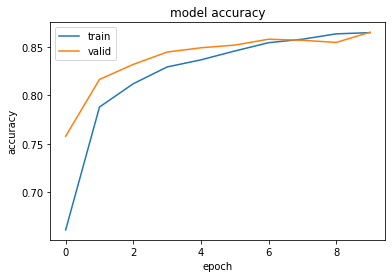

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

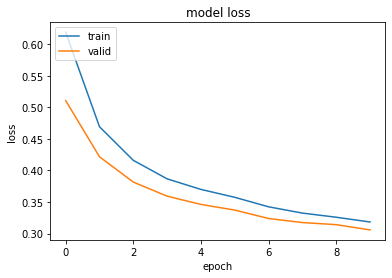

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

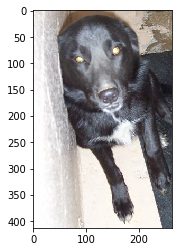

In [117]:
img=plt.imread(r"C:\Users\shilp\OneDrive\Desktop\datap\Dog\10000.jpg")
plt.imshow(img)

In [119]:
img=cv2.imread(r"C:\Users\shilp\OneDrive\Desktop\datap\Dog\10000.jpg")
img=cv2.resize(img,(100,100))
img=img.astype("float")/255.0

In [120]:
img=img.reshape( (1,100,100,3))

In [121]:
c=model.predict(img)

In [122]:
c[0]

array([0.07635739], dtype=float32)

In [127]:
# as prob is low here . so the corresponding label is 0 (dog). Hence correctly classified.